# Model Evluation 

In this module, we review the following topics
1. Polynomial Regression 
2. Training and Testing Data
3. Bias and Variance Balance
4. Feature Selection (feature penalization) 

## 1. Polynomial Regression 
### 1. 1  Rationale

In [22]:
#Rationale 

from IPython.display import IFrame
IFrame('https://en.wikipedia.org/wiki/Polynomial_regression#Definition_and_example', width=1200, height=300)


### 1. 2  Obtain Data

In [2]:
#import packages
import time
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
#we generate some toy data 
np.random.seed(0)
n_samples = 60
#n_samples = 40
#true_fun = lambda X: (200-np.sin(X*np.pi)-np.pi*X**3+3*X**4)
true_fun = lambda X: -(X+0.5)**3 
data_X = np.random.uniform(-2,2,n_samples)
data_y = true_fun(data_X) + (np.random.randn(n_samples))*2

### 1.3. Visualize Data

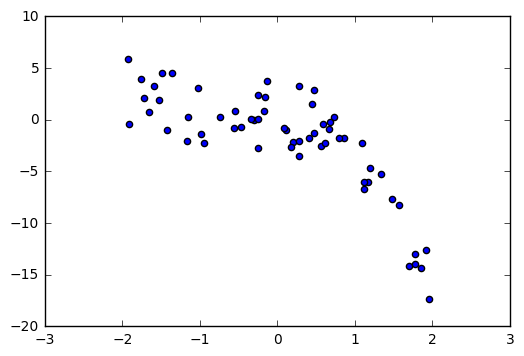

In [4]:
plt.scatter(data_X, data_y)

### 1.3. Train Models

In [5]:
#import scikit learn packages
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

np.random.seed(0)

In [6]:
#create needed functions
def model_fit(degrees, X, y):
    degrees = list(range(1,degrees))
    models = []
    plt.figure(figsize=(14, 14))
    for i in range(len(degrees)):

        ax = plt.subplot(5, int(len(degrees)/5), i + 1)
        
        plt.setp(ax, xticks=(), yticks=())
        plt.tight_layout()

        polynomial_features = PolynomialFeatures(degree=degrees[i],
                                                 include_bias=False)
        
        X_poly = polynomial_features.fit_transform(np.reshape(X,(len(X), 1)))
        
        linear_regression = LinearRegression()
        
        linear_regression.fit(X_poly[:,0:i+1], y)
        

        X_test = np.linspace(-2, 2, 100)
        X_test_poly = polynomial_features.fit_transform(np.reshape(X_test,(len(X_test), 1)))
        plt.plot(X_test, linear_regression.predict(X_test_poly[:, 0:i+1]), label="Model")
        plt.plot(X_test, true_fun(X_test), label="True function")
        plt.scatter(X, y, label="Samples")
        plt.xlabel("x")
        plt.ylabel("y")
        #plt.xlim((0,1))
        #plt.ylim((0,1))
        plt.legend(loc="best")
        plt.title("Degree = {}".format(degrees[i]))
         
        models.append(linear_regression)
    plt.show()
    return models 

def model_mse(degrees, models, X, y):
    degrees = list(range(1,degrees))
    mse=[]
    for i in range(len(degrees)):
        polynomial_features = PolynomialFeatures(degree=degrees[i],
                                                 include_bias=False)
        X_poly = polynomial_features.fit_transform(np.reshape(X,(len(X), 1)))
        mean_square_error = ((y-models[i].predict(X_poly[:, 0:i+1]))**2).sum()/X.shape[0]
        mse.append(mean_square_error)
    return mse
    

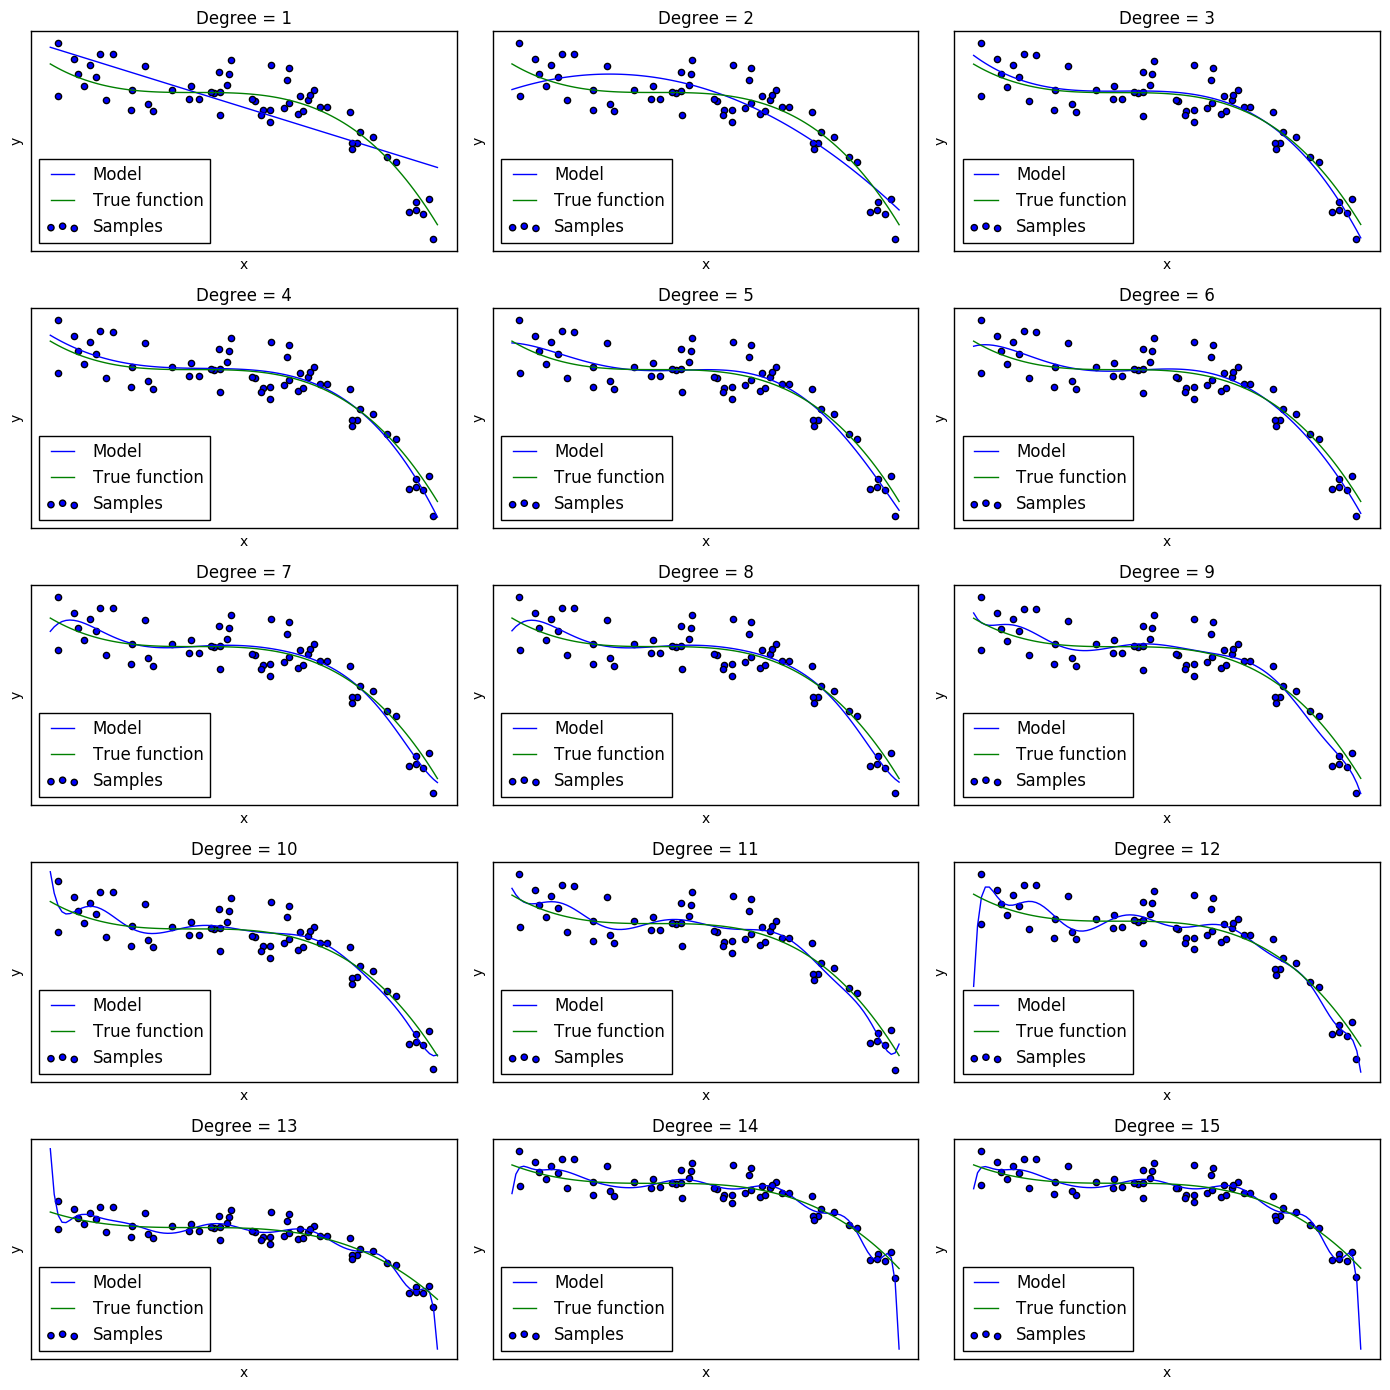

In [7]:
#Train the models

#try up to 16 degrees
degrees = 16

#call the model_fit function
models = model_fit(degrees, data_X, data_y)

[10.257356029268186, 5.4660550149662317, 3.5747345592608837, 3.5660255135865055, 3.5122366084269627, 3.5047868992404529, 3.4679327564237306, 3.4678451416340441, 3.421414347707795, 3.3672594514183687, 3.3498138338310719, 3.2357687913193236, 3.0217338958882456, 2.9720688627834511, 2.9720301870043233]


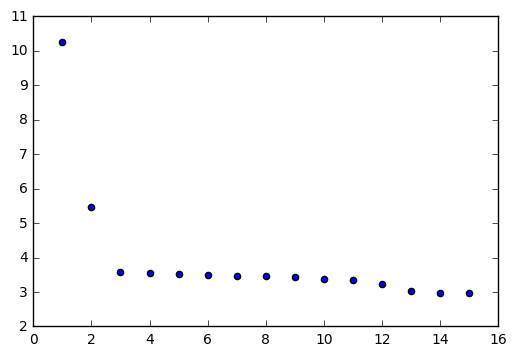

In [8]:
#Plot the MSE of each model
mse = model_mse(degrees, models, data_X, data_y)
print(mse)
plt.scatter(range(1,16), mse)

## 2. Training and Testing Data
### 2.1 Rationale

In [9]:
#Rationale 

from IPython.display import IFrame
IFrame('https://en.wikipedia.org/wiki/Test_set#Rationale', width=1200, height=300)

### 2.2 Split data into training and testing data sets

In [10]:
# sklearn has a script for splitting data
# from sklearn.model_selection import train_test_split
# it's a simple task, so let's do it by hand 

percentage_for_training = 0.75
number_of_training_data = int(n_samples*percentage_for_training)
X_train  = data_X[0:number_of_training_data]
X_test = data_X[number_of_training_data:]
y_train = data_y[0:number_of_training_data]
y_test = data_y[number_of_training_data:]
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(45,) (45,)
(15,) (15,)


### 2.3 Use the training data to train the models

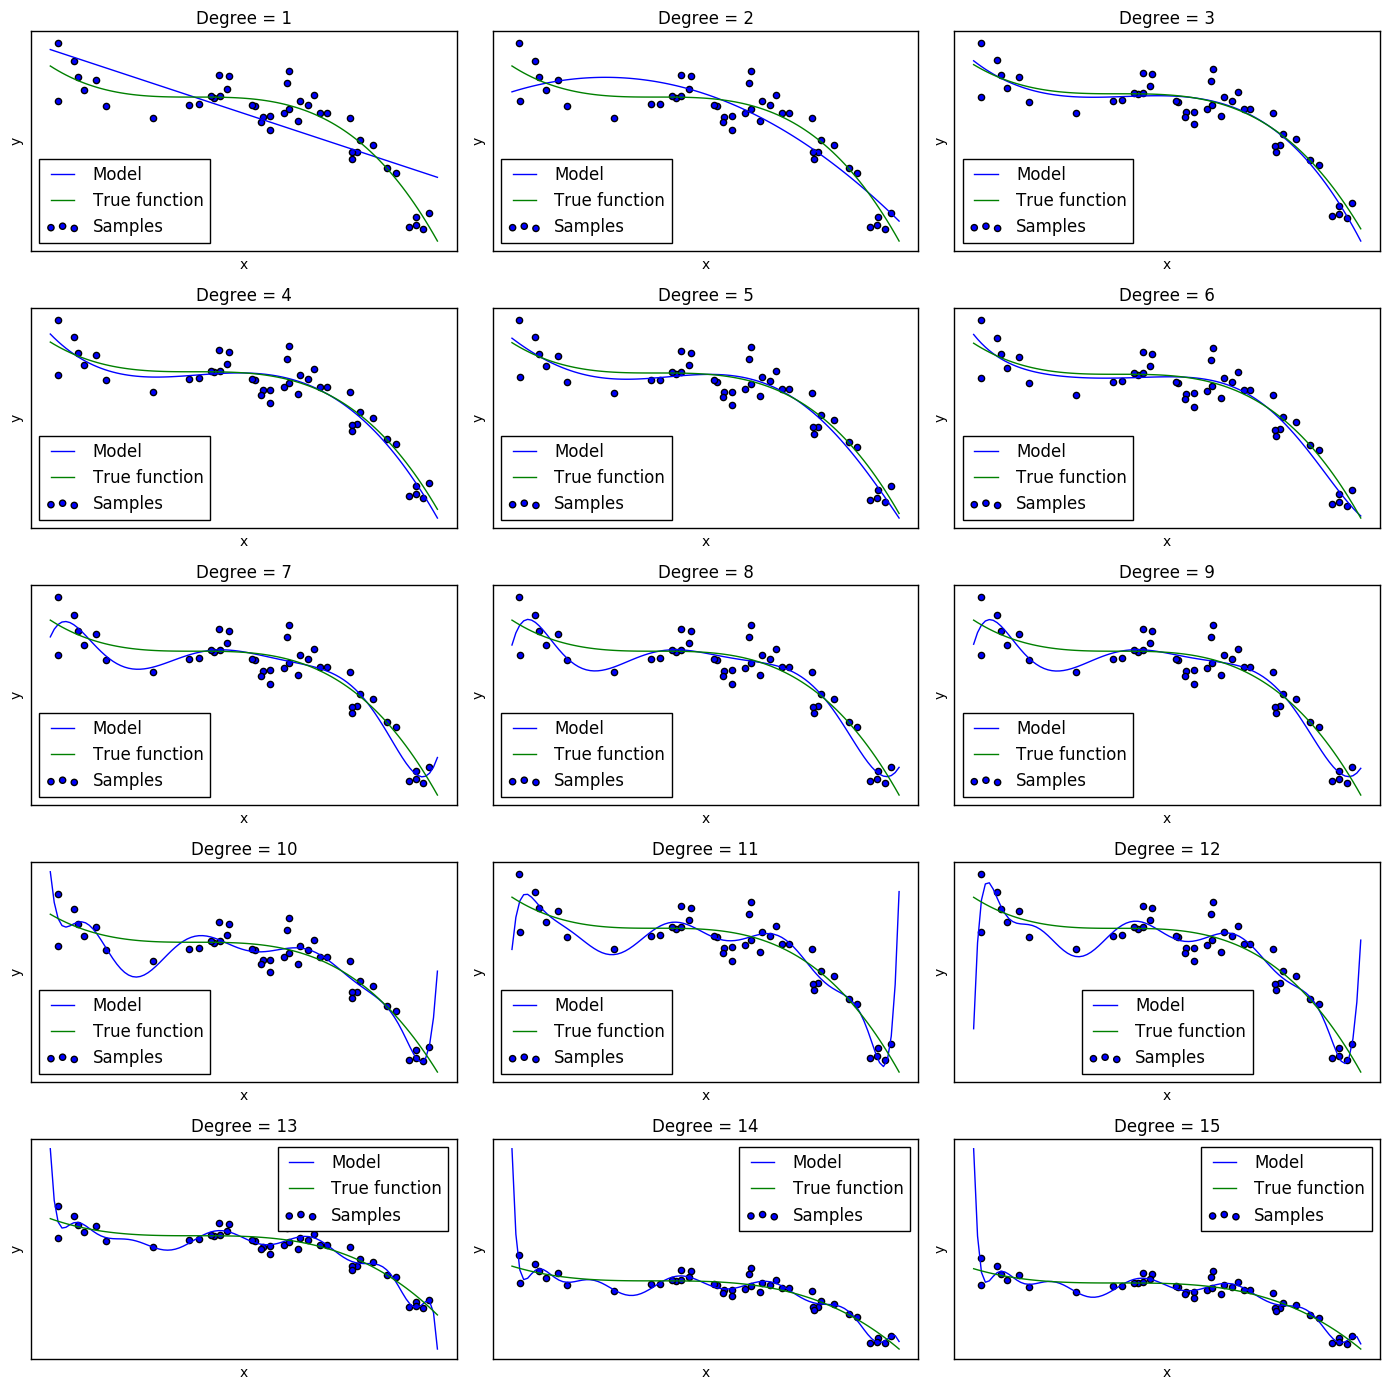

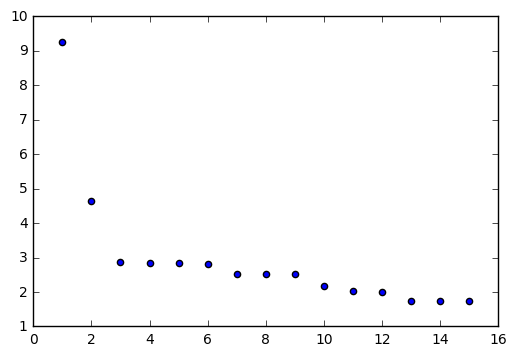

In [11]:
#Call the model_fit function and observe the results
degrees = 16
models = model_fit(16, X_train, y_train)

#Plot MSE of models
mse_train = model_mse(degrees, models, X_train, y_train)
plt.scatter(range(1,16), mse_train)

### 2.4 Take test data into the train the models

[10.257356029268186, 5.4660550149662317, 3.5747345592608837, 3.5660255135865055, 3.5122366084269627, 3.5047868992404529, 3.4679327564237306, 3.4678451416340441, 3.421414347707795, 3.3672594514183687, 3.3498138338310719, 3.2357687913193236, 3.0217338958882456, 2.9720688627834511, 2.9720301870043233]


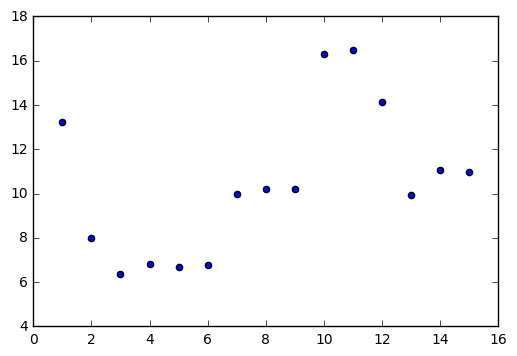

In [12]:
#Do NOT train the models !!!!!
degrees = 16
mse_test = model_mse(degrees, models, X_test, y_test)
print(mse)
plt.scatter(range(1,16), mse_test)

## 3. Bias and Variance Tradeoff
### 3.1 Concept


In [13]:
from IPython.display import IFrame
IFrame('http://scott.fortmann-roe.com/docs/BiasVariance.html', width=1200, height=300)

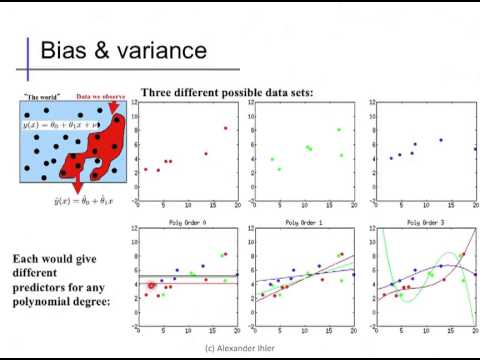

In [14]:
# A short but clear lecture from YouTube
from IPython.display import YouTubeVideo
YouTubeVideo('djRh0Rkqygw')

### 3.2 Compare the MSEs from train and test data sets

In [15]:
#Create needed functions
def draw_mse(start_degree, end_degree, mse): 
    x = range(start_degree,end_degree+1)
    y = mse[start_degree-1:end_degree]
    fig, ax = plt.subplots()
    ax.scatter(x, y)
    for i, txt in enumerate(y):
        ax.annotate(txt, (x[i],y[i]))
    plt.title("MSE vs. Polynomials")
    plt.ylim((min(y)*0.95, max(y)*1.01))
    plt.xlabel("Polynomials")
    plt.ylabel("Mean Squared Error (MSE)")
    plt.plot(x,y)
    
def compare_mse(start_degree, end_degree, mse_train, mse_test): 
    x = range(start_degree,end_degree+1)
    y_test = mse_test[start_degree-1:end_degree]
    y_train = mse_train[start_degree-1:end_degree]
    fig, ax = plt.subplots()
    ax.plot(x, y_train)
    plt.title("MSE vs. Polynomials")
    plt.xlabel("Polynomials")
    plt.ylabel("Mean Squared Error (MSE)")
    plt.plot(x,y_test)

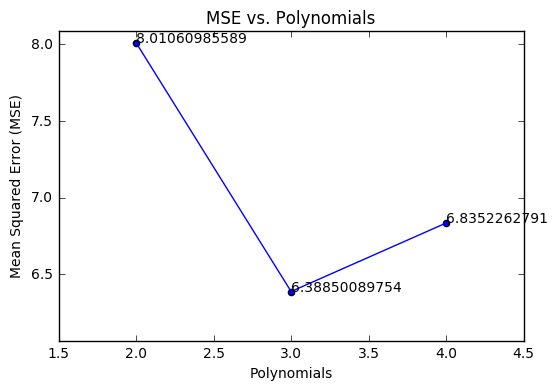

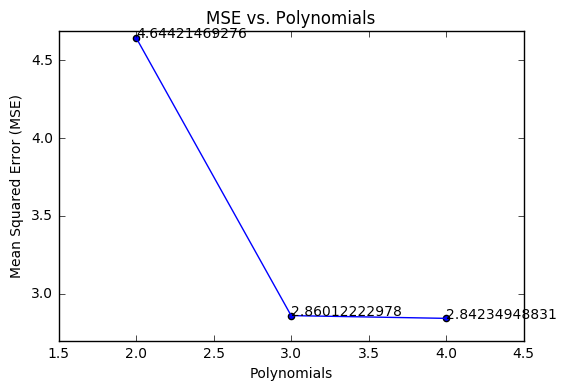

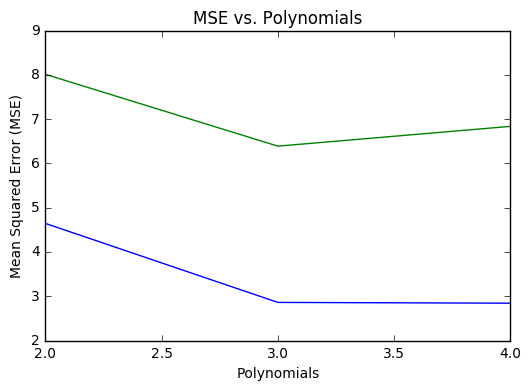

In [16]:
#Plot MSEs
start_degree = 2
end_degree = 4
draw_mse(start_degree, end_degree, mse_test)
draw_mse(start_degree, end_degree, mse_train)
compare_mse(start_degree, end_degree, mse_train, mse_test)

## 4. Feature Selection 
### 4.1 Techniques

In [17]:
from IPython.display import IFrame
IFrame('http://scikit-learn.org/stable/modules/feature_selection.html', width=1200, height=300)

### 4.2 Try LASSO

In [18]:
from sklearn.linear_model import Lasso

#create 16-degree polynomial
degrees = 16
polynomial_features = PolynomialFeatures(degree=degrees, include_bias=False)

#Create the training data set
X_poly_train = polynomial_features.fit_transform(np.reshape(X_train,(len(X_train), 1)))

#Train the model, try different alpha values
Lasso_model = Lasso(alpha=0.1,normalize=True, max_iter=1e5)
Lasso_model.fit(X_poly_train, y_train)
        
         


Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=100000.0,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [19]:
Lasso_model.coef_

array([-0.        , -1.06450425, -1.10990425, -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        , -0.        ])

In [20]:

#Create the training data set
X_poly_test = polynomial_features.fit_transform(np.reshape(X_test,(len(X_test), 1)))

mean_square_error_train = ((y_train-Lasso_model.predict(X_poly_train))**2).sum()/y_train.shape[0]
mean_square_error_test = ((y_test-Lasso_model.predict(X_poly_test))**2).sum()/y_test.shape[0]

In [21]:
print(mean_square_error_train)
print(mean_square_error_test)

3.75889574822
8.99740329925
